In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\amaln\Downloads\US_E-commerce_records2020.csv",encoding='latin1')

In [3]:
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
std,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342
min,13.000000,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2655.750000,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,5183.500000,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,7498.250000,90032.000000,205.105700,5.000000,0.200000,28.315125
max,9994.000000,99301.000000,13999.960000,14.000000,0.800000,6719.980800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [6]:
df.isnull().sum()

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Outlier Detection

## IQR method :

In [7]:
def find_outliers(data, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [8]:
for column in df.select_dtypes(include=[np.number]).columns:
    outliers = find_outliers(df, column)
    print(f"{column} has {len(outliers)} outliers.")

Row ID has 0 outliers.
Postal Code has 0 outliers.
Sales has 366 outliers.
Quantity has 54 outliers.
Discount has 284 outliers.
Profit has 638 outliers.


## Using mean and SD:

In [92]:
def find_outliers_using_mean(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [93]:
for column in df.select_dtypes(include=[np.number]).columns:
    outliers = find_outliers_using_mean(df, column)
    print(f"{column} has {len(outliers)} outliers.")

Postal Code has 0 outliers.
Sales has 48 outliers.
Quantity has 36 outliers.
Discount has 107 outliers.
Profit has 36 outliers.
Sales_log has 5 outliers.


## Plotting Distplot

C:\Users\amaln\AppData\Local\Temp\ipykernel_23592\2295978226.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'],color='r')


<Axes: xlabel='Sales', ylabel='Density'>

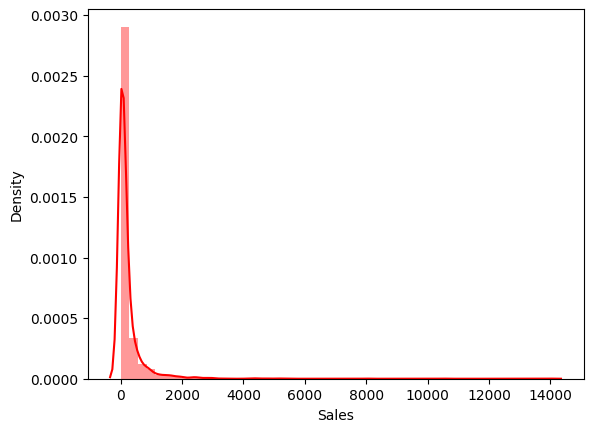

In [9]:
sns.distplot(df['Sales'],color='r')

In [10]:
from scipy.stats import skew,kurtosis

In [11]:
df['Sales'].skew()

10.554725731559309

### Applying log transformation to Sales column(high skewness)

In [12]:
df['Sales_log']=np.log(df['Sales'])

In [13]:
df['Sales_log'].skew()

0.1891911954034789

C:\Users\amaln\AppData\Local\Temp\ipykernel_23592\1885668413.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales_log'],color='r')


<Axes: xlabel='Sales_log', ylabel='Density'>

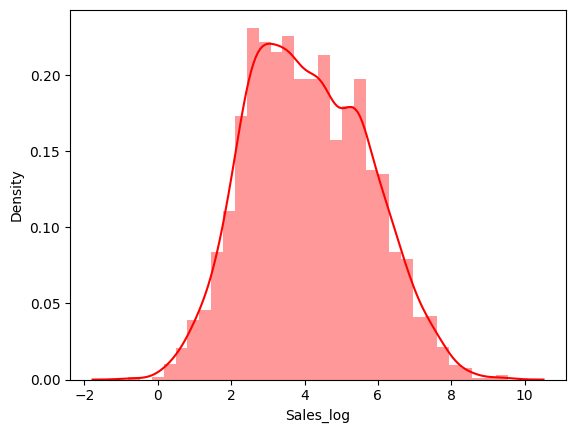

In [14]:
sns.distplot(df['Sales_log'],color='r')

In [15]:
df['Profit'].skew()

8.217176713685884

In [16]:
df['Quantity'].skew()

1.2239690759495512

In [19]:
# Drop columns that are not useful for prediction
df = df.drop(['Order Date', 'Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Product Name'], axis=1)

In [20]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Sales_log
0,Standard Class,Consumer,United States,Lorain,Ohio,44052,East,Furniture,Furnishings,48.896,4,0.2,8.5568,3.889696
1,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Furniture,Furnishings,474.430,11,0.0,199.2606,6.162114
2,First Class,Home Office,United States,Franklin,Wisconsin,53132,Central,Office Supplies,Binders,3.600,2,0.0,1.7280,1.280934
3,Standard Class,Consumer,United States,Huntsville,Texas,77340,Central,Office Supplies,Storage,454.560,5,0.2,-107.9580,6.119330
4,Standard Class,Consumer,United States,Huntsville,Texas,77340,Central,Furniture,Furnishings,141.420,5,0.6,-187.3815,4.951734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,Standard Class,Consumer,United States,New York City,New York,10009,East,Technology,Phones,90.930,7,0.0,2.7279,4.510090
3308,Standard Class,Consumer,United States,New York City,New York,10009,East,Office Supplies,Binders,52.776,3,0.2,19.7910,3.966057
3309,Standard Class,Corporate,United States,Fairfield,California,94533,West,Office Supplies,Binders,13.904,2,0.2,4.5188,2.632177
3310,Standard Class,Corporate,United States,Fairfield,California,94533,West,Office Supplies,Binders,20.720,2,0.2,6.4750,3.031099


## Categorical encoding

In [21]:
# Identify categorical columns for one-hot encoding
categorical_columns = ['Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']


In [22]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [23]:
df_encoded

,Ship Mode,Postal Code,Sales,Quantity,Discount,Profit,Sales_log,Segment_Corporate,Segment_Home Office,City_Abilene,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,Standard Class,44052,48.896,4,0.2,8.5568,3.889696,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,Standard Class,90036,474.430,11,0.0,199.2606,6.162114,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,First Class,53132,3.600,2,0.0,1.7280,1.280934,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Standard Class,77340,454.560,5,0.2,-107.9580,6.119330,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,Standard Class,77340,141.420,5,0.6,-187.3815,4.951734,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,Standard Class,10009,90.930,7,0.0,2.7279,4.510090,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3308,Standard Class,10009,52.776,3,0.2,19.7910,3.966057,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3309,Standard Class,94533,13.904,2,0.2,4.5188,2.632177,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3310,Standard Class,94533,20.720,2,0.2,6.4750,3.031099,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## One-hot encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
#OneHotEncoder for categorical columns
one_hot_encoder=OneHotEncoder()
categorical_columns=df.select_dtypes(include='object').columns

In [26]:
#Create a DF with one-hot encoded columns
encoded_features=one_hot_encoder.fit_transform(df [categorical_columns]).toarray()
encoded_df=pd.DataFrame (encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

In [27]:
#Concatenate with the originel DF
df_encoded=pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)
df_encoded.head()

,Postal Code,Sales,Quantity,Discount,Profit,Sales_log,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,44052,48.896,4,0.2,8.5568,3.889696,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,90036,474.430,11,0.0,199.2606,6.162114,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53132,3.600,2,0.0,1.7280,1.280934,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,77340,454.560,5,0.2,-107.9580,6.119330,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,77340,141.420,5,0.6,-187.3815,4.951734,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
# Separate features and target variable

X = df_encoded.drop(columns=['Sales','Sales_log'])
y = df_encoded['Sales_log']

In [30]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection

# Filter method:correlation analysis

In [90]:
#correlation
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
corr1=numerical_cols.corr()
corr1

,Postal Code,Sales,Quantity,Discount,Profit,Sales_log
Postal Code,1.000000,-0.019208,0.034058,0.039077,-0.009939,-0.003151
Sales,-0.019208,1.000000,0.191127,-0.033516,0.532312,0.582396
Quantity,0.034058,0.191127,1.000000,0.019184,0.053766,0.317506
Discount,0.039077,-0.033516,0.019184,1.000000,-0.218343,-0.170403
Profit,-0.009939,0.532312,0.053766,-0.218343,1.000000,0.195671
Sales_log,-0.003151,0.582396,0.317506,-0.170403,0.195671,1.000000


<Axes: >

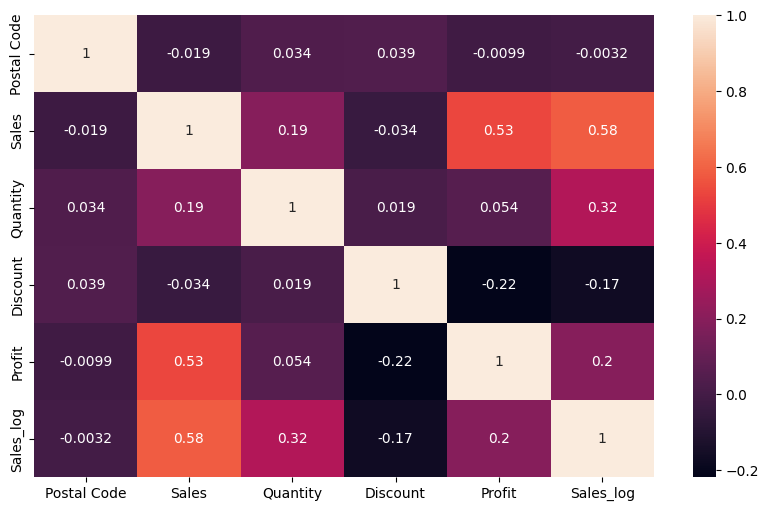

In [91]:
#Heatmap
plt.figure(figsize=(10, 6))  
sns.heatmap(corr1,annot=True)

## Embedded method:Random Forest 

In [31]:
# Feature selection using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values (by='importance', ascending=False)
top_features_rf = feature_importance_df[feature_importance_df['importance']> 0.01]['feature']

In [32]:
selected_features=list(set(top_features_rf))
selected_features  

['Quantity',
 'Sub-Category_Furnishings',
 'Discount',
 'Category_Office Supplies',
 'Postal Code',
 'Sub-Category_Storage',
 'Profit']

In [33]:
#Reduce the dataset to selected features
X_train_selected=X_train[selected_features]
X_test_selected=X_test[selected_features]

## ML Model Building

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [35]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR(kernel='linear'),
    'MLP Regressor': MLPRegressor(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42)
}

In [36]:
# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    return mae, mse, rmse, r2, explained_variance

In [37]:
# Evaluate each model and print the results
for name, model in models.items():
    print(f"Evaluating {name}...")
    mae, mse, rmse, r2, explained_variance = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"Explained Variance Score: {explained_variance}")
    print("-" * 40)

Evaluating Linear Regression...
Mean Absolute Error (MAE): 13931.622320849587
Mean Squared Error (MSE): 22596246097.221092
Root Mean Squared Error (RMSE): 150320.47797030548
R^2 Score: -8369711217.468846
Explained Variance Score: -8368298486.905096
----------------------------------------
Evaluating Decision Tree...
Mean Absolute Error (MAE): 0.3721340863438888
Mean Squared Error (MSE): 0.4158294336700527
Root Mean Squared Error (RMSE): 0.644848380373288
R^2 Score: 0.8459756429902838
Explained Variance Score: 0.846405790265663
----------------------------------------
Evaluating Random Forest...
Mean Absolute Error (MAE): 0.2888476348141332
Mean Squared Error (MSE): 0.22154596179512978
Root Mean Squared Error (RMSE): 0.4706866917548549
R^2 Score: 0.9179387711629141
Explained Variance Score: 0.918150532491808
----------------------------------------
Evaluating Support Vector Machine...
Mean Absolute Error (MAE): 97.74032676757066
Mean Squared Error (MSE): 66042.7698048781
Root Mean Squar

# Hyperparameter tuning

# MLP Regressor Hyperparamter tuning

In [38]:
from sklearn.model_selection import  GridSearchCV

In [39]:
# Define the parameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'max_iter': [1000, 1500]
}

In [40]:
# Initialize the model
mlp = MLPRegressor()

In [41]:
# Perform Grid Search with Cross-Validation
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_mlp.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(100,), (100, 50)],
                         'max_iter': [1000, 1500]},
             scoring='r2', verbose=2)

In [42]:
# Get the best model and parameters
best_mlp = grid_search_mlp.best_estimator_
print(f"Best parameters for MLPRegressor: {grid_search_mlp.best_params_}")

Best parameters for MLPRegressor: {'hidden_layer_sizes': (100,), 'max_iter': 1000}


# RandomForestRegressor Hyperparameter Tuning

In [43]:

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10]
}

In [44]:
# Initialize the model
rf = RandomForestRegressor()

In [45]:
# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [46]:
# Get the best model and parameters
best_rf = grid_search_rf.best_estimator_
print(f"Best parameters for RandomForestRegressor: {grid_search_rf.best_params_}")

Best parameters for RandomForestRegressor: {'max_depth': 10, 'n_estimators': 200}


# GradientBoostingRegressor Hyperparameter Tuning

In [47]:
# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}

In [48]:
# Initialize the model
gb = GradientBoostingRegressor()

In [49]:
# Perform Grid Search with Cross-Validation
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [50]:
# Get the best model and parameters
best_gb = grid_search_gb.best_estimator_
print(f"Best parameters for GradientBoostingRegressor: {grid_search_gb.best_params_}")

Best parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'n_estimators': 200}


# AdaBoostRegressor Hyperparameter Tuning

In [51]:

# Define the parameter grid
param_grid_ab = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}


In [52]:
# Initialize the model
ab = AdaBoostRegressor()

In [53]:
# Perform Grid Search
grid_search_ab = GridSearchCV(estimator=ab, param_grid=param_grid_ab, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_ab.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [54]:
# Get the best model and parameters
best_ab = grid_search_ab.best_estimator_
print(f"Best parameters for AdaBoostRegressor: {grid_search_ab.best_params_}")

Best parameters for AdaBoostRegressor: {'learning_rate': 0.1, 'n_estimators': 100}


# Linear Regression

In [55]:
# Define the parameter grid
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

In [56]:
# Define the model
lr = LinearRegression()

In [57]:
# Perform Grid Search
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\amaln\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\amaln\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amaln\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\amaln\AppData\

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2', verbose=2)

In [58]:

# Best model and parameters
best_lr = grid_search_lr.best_estimator_
print(f"Best parameters for Linear Regression: {grid_search_lr.best_params_}")

Best parameters for Linear Regression: {'fit_intercept': False, 'positive': True}


# Decision Tree

In [59]:
# Define the parameter grid
param_grid_dt = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
}

In [60]:
# Define the model
dt = DecisionTreeRegressor(random_state=42)

In [61]:
# Perform Grid Search
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'min_samples_split': [2, 5]},
             scoring='r2', verbose=2)

In [62]:
# Get the best model and parameters
best_dt = grid_search_dt.best_estimator_
print(f"Best parameters for DecisionTreeRegressor: {grid_search_dt.best_params_}")

Best parameters for DecisionTreeRegressor: {'max_depth': 10, 'min_samples_split': 5}


In [63]:
# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)

    print("-" * 50)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"Explained Variance Score: {explained_variance}")
    print("-" * 50)


# Evaluation of best model

In [64]:
best_models = {
    'RandomForestRegressor': best_rf,
    'MLPRegressor': best_mlp,
    'GradientBoostingRegressor': best_gb,
    'AdaBoostRegressor': best_ab,
    'LinearRegression': best_lr,
    'DecisionTreeRegressor': best_dt
}

In [70]:
# Evaluate each model
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    evaluate_model(model, X_test, y_test)

Evaluating RandomForestRegressor...
--------------------------------------------------
Mean Absolute Error (MAE): 0.3109588744236468
Mean Squared Error (MSE): 0.23617817373949002
Root Mean Squared Error (RMSE): 0.4859816598797634
R^2 Score: 0.9125189599281274
Explained Variance Score: 0.912648793102786
--------------------------------------------------
Evaluating MLPRegressor...
--------------------------------------------------
Mean Absolute Error (MAE): 1.5013893752470424
Mean Squared Error (MSE): 15.011288907592636
Root Mean Squared Error (RMSE): 3.8744404638079852
R^2 Score: -4.560222376450679
Explained Variance Score: -4.368007144124885
--------------------------------------------------
Evaluating GradientBoostingRegressor...
--------------------------------------------------
Mean Absolute Error (MAE): 0.3146386214578346
Mean Squared Error (MSE): 0.23145440480670865
Root Mean Squared Error (RMSE): 0.4810970845959354
R^2 Score: 0.9142686568317656
Explained Variance Score: 0.9144184

# Analysis of model performance

In [71]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score


In [72]:
# Define the models
models = {
    'RandomForestRegressor': RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, random_state=42)
}

In [73]:
# Define the scoring function (Mean Squared Error)
scoring = make_scorer(mean_squared_error, greater_is_better=False)


In [88]:
# Perform cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    # Calculate the mean and standard deviation of the cross-validation scores
    mean_score = np.mean(scores)
    std_dev = np.std(scores)
    # Convert negative MSE back to positive for readability
    mean_score = -mean_score
    print(f"{name} Cross-Validation:")
    print(f"Mean MSE: {mean_score:.4f}")
    print(f"Standard Deviation of MSE: {std_dev:.4f}")
    print("\n")

    

RandomForestRegressor Cross-Validation:
Mean MSE: 0.2351
Standard Deviation of MSE: 0.0216


GradientBoostingRegressor Cross-Validation:
Mean MSE: 0.2322
Standard Deviation of MSE: 0.0178


